# This Notebook illustrate methods for computation of the Frechet Mean on the curved cone of positive definite matrices

The \textit{Log Euclidian Mean} for a set of symmetric positive defite matrices $\{A_1,\dots , A_N\}$ introduced by Arsigdy is given by introducing a vector space structure on $\mathcal{P}^d$ where the mean is given by arithmetic mean via 
\begin{align*}
X_{LE} =  \exp(\frac{1}{N}\sum_{i = 1}^Nlog(A_i)) \qquad (0)
\end{align*}
Note for the case of two matrices which not commutes this mean not recovers the exact Riamanian mean

In [1]:
'Generate Random Matrices'
import numpy as np
import sys
sys.path.append('/home/dmitrij/Documents/HDE_Code_Folder/Feature_Extraction_Lib/src/Covariance_Descriptor/')

def Random_SPD(n,N):
    SPD_Array = []
    for k in range(N):
        s = np.random.randn(n)
        semidef = s[:,None] @ s[None,:]
        semidef += 0.1*np.eye(n)
        SPD_Array.append(semidef)
    return np.array(SPD_Array)

To compute the mean determined by the optimality condition 
\begin{align}
\frac{1}{N}\sum_{i = 1}^N \log(A_i^{-1}X) = 0
\end{align}
on a Riamanian manifold with metric 
\begin{align}
d_R(A,B) = ||\log(A^{-\frac{1}{2}}B A^{-\frac{1}{2}})||_F
\end{align}


In [2]:
## Log Euclidian Mean
from scipy.linalg import logm,expm
from Stein_Divergence_Mean import Log_Euclid_Mean
Random_Mat = Random_SPD(5,100)
Mean_Euclid = Log_Euclid_Mean(Random_Mat)

The simplest computation of Frechet Mean is the choice of an **gradient descent** step with a stepsize $\tau_k$ which yields to the itaration 
\begin{align}
G_{k+1} =  G_{k} \exp(-\tau_k\frac{1}{N}\sum_{i = 1}^N\log(A_i^{-1}G_k),\quad \quad \tau_k = \frac{1}{k} \qquad (1),
\end{align}
which may equivalently written by using $\exp(A^{-1}BA) = A^{-1}\exp(B)A$ as 
\begin{align}
G_{k+1} =  G^{\frac{1}{2}}_{k} \exp(-\tau_k\frac{1}{N}\sum_{i = 1}^N\log(G_k^{-\frac{1}{2}}X_kA^{-1}_iG_k^{-\frac{1}{2}})G_k^{\frac{1}{2}},\quad \quad \tau_k = \frac{1}{k} \qquad (2)
\end{align}

In [3]:
import sys
sys.path.append('/home/dmitrij/Documents/HDE_Code_Folder/Feature_Extraction_Lib/src/Covariance_Descriptor/')
from Geometric_Kmeans import Gradient_Descent_Mean

In [4]:
Mean_Riemann_Gradient_Descent,_,_ = Gradient_Descent_Mean(Random_Mat)

Completed sucessfully

 Required ****10**** Iterations


Requered Iterations -------2.5253241062164307------- seconds


Motivated by the Euclidian mean which for three vectors admitts a closed from expression
\begin{align*}
G = A_1+\frac{1}{3}((A_3-A_1)+(A_2-A_1)+(A_1-A_1))
\end{align*}
Bini and Ianazzo generalized this idea to $\mathcal{P}_d$ by introducing the **cheap mean** iterations
\begin{align}
A_{i}^{k+1} = \big( A_{i}^k \big)^{\frac{1}{2}}  \exp(\frac{1}{N}\sum_{j = 1}^N\log(\big( A_{i}^k \big)^{-\frac{1}{2}}(A^k_j)\big( A_{i}^k \big)^{-\frac{1}{2}}) \big( A_{i}^k \big)^{\frac{1}{2}} \qquad (3)
\end{align}
The above computation may be performed parallel using Cholesky decomposition at each iteration loop.

In [4]:
' Returnes Cheap Mean Initializatuion by (3) '
from Cheap_Mean import Cheap_Mean
Cheap_Mean_Init = Cheap_Mean(Random_Mat)

KeyboardInterrupt: 

A combination of (1) and (3) consists in two steps: First lineariation of the matrix exponential mapping $\exp$ in $(1)$ via 
\begin{align}
\exp(tA) = I + tA 
\end{align}
that results in the **Richardson iteration**
\begin{align}
G_{\nu+1}=G_{\nu}-\tau_{\nu} G_{\nu}\sum_{i=1}^{k}\log(A_{i}^{-1}G_{\nu}) = G_{\nu}\,-\,\tau_{\nu} G_{\nu}^{1/2}\sum_{i=1}^{k}\log\left(G_{\nu}^{1/2}A_{i}^{-1}G_{\nu}^{1/2}\right)G_{\nu}^{1/2}. \qquad (4)
\end{align}


The above  and admitts the following alternative formulations, first  
\begin{align}
G_{k+1} =  G_{k} -\tau_k\sum_{i = 1}^N\log(A_i^{-1}G_k), \quad 
G_{k+1} =  G_{k} -\tau_k G^{\frac{1}{2}}_{k} \sum_{i = 1}^N\log(G^{\frac{1}{2}}_{k}A_i^{-1}G^{\frac{1}{2}}_{k})G^{\frac{1}{2}}_{k},\quad \quad \tau_k = \frac{1}{k}
\end{align}
used for avoiding calculation of matrix invesres by setting $G = Y^{-1}$ and  second if matrix inverses are ill conditioned reverting the above iteration by setting
\begin{align}
Y_{k+1} =  Y_{k} -\tau_k Y_{k}^{\frac{1}{2}} \sum_{i = 1}^N\log(Y^{\frac{1}{2}}_{k}A_iY^{\frac{1}{2}}_{k})Y_{k}^{\frac{1}{2}},\quad \quad \tau_k = \frac{1}{k}
\end{align}
With the Cholesky decomposition $A_k = L_k L_k^T$ this which is cheaper as computing matrix square roots and the equation defining the cheap mean reduces to the final iteration scheme of Richardson iteration.
Bini and Ianazza viewed (3) as linearization of more general mean iteration scheme called the **Bini mean**
\begin{align}
G_{\nu+1}=G_{\nu}^{1/2}\exp\left(-\vartheta_{\nu}\sum_{i=1}^{k}\log(G_{\nu}^{1/2}A_{i}^{-1}G_{\nu}^{1/2})\right)G_{\nu}^{1/2} \qquad (5)
\end{align}
which using the **cheap mean** (3) as initialization was proven to be more flexible iteration scheme with better convergence properties then (4).

In [3]:
# Bini Mean accelerated with Cython
from Descriptor_Cython.Geometric_Mean_Utils import Bini_Riemann

Mean_Bini = Bini_Riemann(Random_Mat)

Requered Iterations -------0.16881012916564941------- seconds


**Geometric Mean by Approximative Joint Diagonalization:** 
Given a set $C_1,\dots,C_N$ of symmetric positive definite matrices, the idea of (AJD) is based on the Riemannian mean property given by congruence invariance  
\begin{align}
\mathcal{G}_{R}\{C_{1},\cdot\cdot\cdot\cdot,C_{\mathrm{K}}\}=G\mathcal{G}_{R}\{H C_{1}H^{T},\cdot\cdot\cdot,H\mathcal{C}_{\mathrm{K}}H^{T}\}G^{T}. \qquad (6)
\end{align}
where $\mathcal{G}_{R}$ denotes the Riemannian mean of a set and $G = H^{-1}$. Instead of approximating the left hand side of (6), (AJD) approximates the right hand side of (6) to find $H$ that jointly diagonalizes $HC_kH^T \approx D_k$ (nearly diagonal). In the mean is computed of matrices which commuate under the matrix multiplication in which case the Riemannian mean admitts a closed form expression 
\begin{align}
\mathcal{G}_{AJD}^{^{n}}=A\mathcal{G}_{_{LE}}\{B C_{1}B^{T},\cdots,B C_{\mathrm{K}}B^{T}\}A^{^{T}}=A\exp\Bigl(1/\mathrm{K}\sum_{k}\mathrm{ln}(B C_{k}B^{T})\Bigr)A^{^{T}},
\end{align}
where $\mathcal{G}_{_{LE}}$ denotes the **Log-Euclidian Mean** (0).

In [ ]:
# AJD Mean 
from AJD_Mean_Algorithm import geometric_mean

Mean_AJD,_,_ = geometric_mean(Random_Mat)

Another class of alogorithms replace the Riamannian metric with surrogate distance funciton by means of divergence
\begin{align}
	D_{\phi}(x,y) := \phi(x) -\phi(y) + \langle\nabla \phi(x),y-x\rangle 
\end{align}
 with $\phi(X) = \log \det (X)$ and after symetrize the distance by setting
\begin{align}
D^S(S_1,S_2) := 
\frac{1}{2}(D_{\phi}(S_1,\frac{S_1+S_2}{2})+D_{\phi}(S_2,\frac{S_1+S_2}{2}), 
\quad S_1, S_2 \in 
\mathcal{P}_d,
\end{align}
leads to the **Stein divergence** which for $S_1,S_2 \in \mathcal{P}^d$ is given by 
\begin{align}
	d^2_{Stein}(S_1,S_2) = \log 
	\det (\frac{S_1+S_2}{2}) -\log \det (S_1 S_2)).
\end{align}
which is a sum of a convex and concave term.
The Riamanian mean with repsect to this distance leads to the optimality condition 
\begin{align}
0 = S R(S,S_1,\dots S_N)S -S ,\\ 
R(S,S_i) = 
\sum_{i = 1}^N \omega_i \frac{1}{2}(\frac{S+S_i}{2})^{-1} ,\quad 
\quad \sum_{i = 1}^N \omega_i = 1.
\end{align}
For determing the $S$ satisfying the above equation we use a gradient descent scheme 
\begin{align}
G_{k+1} = G_{k} - \tau (G_{k} R(G_k,S_1,\dots S_N)G_k - G_k)
\end{align}

In [ ]:
from Stein_Divergence_Mean import Stein_Mean_Geom
Mean_Stein = Stein_Mean_Geom(Random_Mat)

# Evaluate and Plot Running Time, Iterations 

In [ ]:
List_Mean_Log_Euclid_time        = []
List_Riamann_Gradient_time       = []
List_Riamann_Bini_time           = []
List_Stein_Mean_time             = []
List_Stein_Mean_Geom_time        = []
List_JAD_time                    = []
List_Intrinsic_Mean_Flecher_time = []
List_Mean_Log_Euclid_it          = []
List_Riamann_Gradient_it         = []
List_Riamann_Bini_it             = []
List_Stein_Mean_it               = []
List_Stein_Mean_Geom_it          = []
List_JAD_it                      = []
List_Intrinsic_Mean_Flecher_it   = []
for Size in range(10,200,10):
    Array = Random_SPD(8,int(Size))
    _,Rtime,It  = Gradient_Descent_Mean(Array)
    List_Riamann_Gradient_time.append(Rtime)
    List_Riamann_Gradient_it.append(It)
    _,Rtime,It  = Stein_Mean_Geom(Array)
    List_Stein_Mean_Geom_time.append(Rtime)
    List_Stein_Mean_Geom_it.append(It)                  
    _,Rtime,It  = geometric_mean(Array)
    List_JAD_time.append(Rtime)
    List_JAD_it.append(It)

In [ ]:
Int_1 = np.linspace(0,200,num = 19)
plt.style.use('ggplot')
#plt.plot(Int_1,np.array(List_Mean_Log_Euclid_it),label = 'Log_Euc')
plt.plot(Int_1,np.array(List_JAD_it),label = 'AJD')
plt.plot(Int_1,np.array(List_Stein_Mean_Geom_it),label = 'Stein')
plt.plot(Int_1,np.array(List_Riamann_Gradient_it),label = 'Grad_Descent' )
plt.xlabel('Number of squared matrices size 3')
plt.ylabel('Running_Iterations')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [3]:
from Geometric_Kmeans import K_means

Test = K_means(Random_Mat,K = 2, Metric = 'Log_Det')

In [5]:
Test

array([[ 0.27787612, -0.06156403, -0.07234982,  0.00244176,  0.0472393 ,
        -0.06156403,  0.3898257 ,  0.01038758, -0.01919001,  0.02914623,
        -0.07234982,  0.01038758,  0.33885793,  0.01583179, -0.03851254,
         0.00244176, -0.01919001,  0.01583179,  0.43213025, -0.08515624,
         0.0472393 ,  0.02914623, -0.03851254, -0.08515624,  0.31344149],
       [ 0.637446  ,  0.05648641,  0.02208925, -0.00906965, -0.25664703,
         0.05648641,  0.21384137,  0.0289659 , -0.01613034, -0.02674497,
         0.02208925,  0.0289659 ,  0.24295054, -0.0135978 , -0.02503092,
        -0.00906965, -0.01613034, -0.0135978 ,  0.24623711,  0.05796417,
        -0.25664703, -0.02674497, -0.02503092,  0.05796417,  0.39569841]])

# Return Discriprtors

In [2360]:
Des_Stein = Return_Descriptors(f_cov=Random_Mat.astype(np.float64),layer_mask = layer_mask[:,:,2:58],\
                               Scan= Scans,save = False,Layers=layer_mask.max())

Extract Descriptors from scan ****19****
Extract Descriptors from Layer ****0*****
(19255, 10, 10)
(19255, 10, 10)
K means finished with 1  iterations
Extract Descriptors from Layer ****1*****
(2468, 10, 10)
(2468, 10, 10)
K means finished with 1  iterations
Extract Descriptors from Layer ****2*****
(3183, 10, 10)
(3183, 10, 10)
K means finished with 1  iterations
Extract Descriptors from Layer ****3*****
(2393, 10, 10)
(2393, 10, 10)
K means finished with 1  iterations
Extract Descriptors from Layer ****4*****
(2452, 10, 10)
(2452, 10, 10)
K means finished with 1  iterations
Extract Descriptors from Layer ****5*****
(1847, 10, 10)
(1847, 10, 10)
K means finished with 1  iterations
Extract Descriptors from Layer ****6*****
(3733, 10, 10)
(3733, 10, 10)
K means finished with 1  iterations
Extract Descriptors from Layer ****7*****
(1700, 10, 10)
(1700, 10, 10)
K means finished with 1  iterations
Extract Descriptors from Layer ****8*****
(1272, 10, 10)
(1272, 10, 10)
K means finished with

In [49]:
Des = np.load('Descriptors_Stein_OCT/Cov_FDA_Descriptors_Not_mod.npy')

In [543]:
Des = np.append(Des,Des_3.reshape(11,100,10,10),axis=1)

In [544]:
Des_Shuffled = np.swapaxes(Des.copy(),axis1= 1,axis2=0)

In [545]:
np.random.shuffle(Des_Shuffled) 

In [546]:
Des_Random = np.swapaxes(Des_Shuffled,axis1=1,axis2=0) 

In [515]:
np.save('Descriptors_Stein_OCT/Cov_FDA_Descriptors',Des)

In [597]:
Des = Des_Stein.reshape(11,200,10,10)

In [491]:
Des_shuffled = np.swapaxes(Des,axis1=1,axis2=0) 
p.random.shuffle(np.swapaxes(Des,axis1=1,axis2=0))

In [296]:
octdata_full.shape


(221, 562, 61)

In [510]:
Des = np.append(D,Des_Stein.reshape(11,100,10,10),axis = 1)

In [2358]:
'Volumes for Training'

octdata_full = np.swapaxes(np.load('Illustration_Paper_GSPR/FDA_Train_Des/FDA_044_C_38.npy'),axis1=2,axis2=0)
layer_mask   = np.swapaxes(np.load('Illustration_Paper_GSPR/FDA_Train_Des/FDA_044_C_38_gt.npy'),axis1=2,axis2=0)

In [17]:
D = []
for k in range(0,15):
    print("Computed distance matrix after layers {:.2f} s".format(k))
    D.append(distance_Riemmann(f_pd[:,:,20:70].reshape(-1,10,10), Des.reshape(14,200,10,10)[:,k,:,:]))
D_12 = np.array(D).min(0)
np.save('D_00_Distance',D_12)
del D_12

Computed distance matrix after layers 0.00 s
Computed distance matrix after layers 1.00 s
Computed distance matrix after layers 2.00 s
Computed distance matrix after layers 3.00 s
Computed distance matrix after layers 4.00 s
Computed distance matrix after layers 5.00 s
Computed distance matrix after layers 6.00 s
Computed distance matrix after layers 7.00 s
Computed distance matrix after layers 8.00 s
Computed distance matrix after layers 9.00 s
Computed distance matrix after layers 10.00 s
Computed distance matrix after layers 11.00 s
Computed distance matrix after layers 12.00 s
Computed distance matrix after layers 13.00 s
Computed distance matrix after layers 14.00 s


In [2]:
D_1 = np.load('D_11_Distance.npy')
D_2 = np.load('D_12_Distance.npy')
D_3 = np.load('D_13_Distance.npy')
D_4 = np.load('D_21_Distance.npy')
D_5 = np.load('D_120_Distance.npy')
D_6 = np.load('D_135_Distance.npy')
D_7 = np.load('D_150_Distance.npy')
D_8 = np.load('D_165_Distance.npy')
D_9 = np.load('D_180_Distance.npy')
D_10 = np.load('D_190_Distance.npy')
D_11 = np.load('D_200_Distance.npy')
D_12 = np.load('D_23_Distance.npy')
D_13 = np.load('D_22_Distance.npy')

In [3]:
D = np.array([D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_10,D_11,D_12,D_13]).min(0)

In [186]:
List_Mean_Log_Euclid_time        = []
List_Riamann_Bini_time           = []
List_Stein_Mean_time             = []
List_Mean_Log_Euclid_stdv        = []
List_Riamann_Bini_stdv           = [] 
List_Stein_Mean_stdv             = []
List_Riamann_Bini_Means          = []
List_Stein_Mean_Means            = []
List_Euclid_Means                = []


Std = np.zeros((3,299,30))


for H,Size in enumerate(range(100,30000,299)):
    
    for run in range(30):
        Array = f_pd.reshape(-1,10,10)[0:Size,:,:]
        Clusters_Stein,Clusters_Riemann,Clusters_Log_Eucl,\
        time_Log_Euclid,time_Riemann,time_Stein = Return_Time_Means(Array)
        Std[0,H,run] = time_Log_Euclid
        Std[1,H,run] = time_Riemann
        Std[2,H,run] = time_Stein
    
    List_Riamann_Bini_time.append(np.mean(Std[1,H,:]))
    List_Riamann_Bini_Means.append(Clusters_Riemann)
    List_Stein_Mean_time.append(np.mean(Std[2,H,:]))                 
    List_Mean_Log_Euclid_time.append(np.mean(Std[0,H,:]))
    List_Riamann_Bini_stdv.append(np.std(Std[1,H,:]))   
    List_Stein_Mean_stdv.append(np.std(Std[2,H,:]))                 
    List_Mean_Log_Euclid_stdv.append(np.std(Std[0,H,:]))
    List_Stein_Mean_Means.append(Clusters_Stein) 
    List_Euclid_Means.append(Clusters_Log_Eucl)
    
#from matplotlib import pyplot as plt
#plt.plot(np.linspace(200,10),np.array(List_Mean_Grad))
#plt.legend('Grad')
#plt.plot(np.linspace(200,10),np.array(List_Mean_Quadr))
#plt.legend('Bini')
#plt.show()


Requered Iterations -------0.04109334945678711------- seconds
Requered Iterations -------0.040747880935668945------- seconds
Requered Iterations -------0.04056978225708008------- seconds
Requered Iterations -------0.040573835372924805------- seconds
Requered Iterations -------0.04071664810180664------- seconds
Requered Iterations -------0.04104447364807129------- seconds
Requered Iterations -------0.04055023193359375------- seconds
Requered Iterations -------0.04057002067565918------- seconds
Requered Iterations -------0.04048919677734375------- seconds
Requered Iterations -------0.04075813293457031------- seconds
Requered Iterations -------0.04050493240356445------- seconds
Requered Iterations -------0.047637224197387695------- seconds
Requered Iterations -------0.04128623008728027------- seconds
Requered Iterations -------0.040612220764160156------- seconds
Requered Iterations -------0.04056811332702637------- seconds
Requered Iterations -------0.040608882904052734------- seconds
Req

In [173]:
Save_R_Time = np.array(List_Riamann_Bini_time)

In [174]:
Save_R_Mean = np.array(List_Riamann_Bini_Means)
Save_S_Mean = np.array(List_Stein_Mean_Means)
Save_E_Mean = np.array(List_Euclid_Means)

In [189]:
Save_R_Time = np.array(List_Riamann_Bini_time)
Save_S_Time = np.array(List_Stein_Mean_time)
Save_E_Time = np.array(List_Mean_Log_Euclid_time)
Save_E_Time_std = np.array(List_Mean_Log_Euclid_stdv)
Save_R_Time_std = np.array(List_Riamann_Bini_stdv)
Save_S_Time_std = np.array(List_Stein_Mean_stdv)

In [176]:
Save_E_Time = np.array(List_Mean_Log_Euclid_time)

In [190]:
np.save('Save_S_Plot',Save_S_Time)
np.save('Save_R_Plot',Save_R_Time)
np.save('Save_E_Plot',Save_E_Time)
np.save('Save_S_Plot_std',Save_S_Time_std)
np.save('Save_R_Plot_std',Save_R_Time_std)
np.save('Save_E_Plot_std',Save_E_Time_std)

In [149]:
np.save('Save_E_Plot',Save_E_Time)

In [182]:
np.save('Save_R_Plot',Save_R_Time)
np.save('Save_S_Plot',Save_S_Time)
np.save('Save_E_Plot',Save_E_Time)
np.save('Save_RM_Plot',Save_R_Mean)
np.save('Save_SM_Plot',Save_S_Mean)
np.save('Save_EM_Plot',Save_E_Mean)

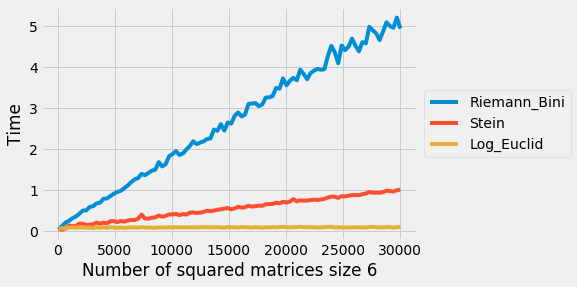

In [193]:
from matplotlib import pyplot as plt

Int_1 = np.linspace(100,30000,100)


plt.style.use('fivethirtyeight')
#plt.plot(Int_1,np.array(List_Mean_Log_Euclid_time ),label = 'Log_Euc')
plt.plot(Int_1,np.array(Save_R_Time),label = 'Riemann_Bini')
plt.plot(Int_1,np.array(Save_S_Time),label = 'Stein')
#plt.plot(np.linspace(200,10),np.array(List_Stein_Mean_Geom_time))
#plt.legend('Stein_geom')
#plt.plot(Int_1,np.array(List_JAD_time),label = 'JAD_Mean')
#plt.legend('JAD_Mean')
plt.plot(Int_1,np.array(Save_E_Time),label = 'Log_Euclid' )
plt.xlabel('Number of squared matrices size 6')
plt.ylabel('Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

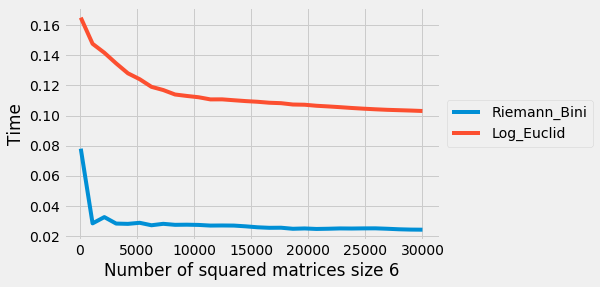

In [181]:
from matplotlib import pyplot as plt

Int_1 = np.linspace(100,30000,30)


plt.style.use('fivethirtyeight')
#plt.plot(Int_1,np.array(List_Mean_Log_Euclid_time ),label = 'Log_Euc')
plt.plot(Int_1,Distance_Riemann_Stein,label = 'Riemann_Bini')
#plt.plot(Int_1,Save_S_Time,label = 'Stein')
#plt.plot(np.linspace(200,10),np.array(List_Stein_Mean_Geom_time))
#plt.legend('Stein_geom')
#plt.plot(Int_1,np.array(List_JAD_time),label = 'JAD_Mean')
#plt.legend('JAD_Mean')
plt.plot(Int_1, Distance_Riemann_Euclid,label = 'Log_Euclid' )
plt.xlabel('Number of squared matrices size 6')
plt.ylabel('Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [57]:
D_00 = np.load('D_00_Distance.npy').reshape((octdata_full.shape[0],octdata_full.shape[1],50,14))
D_15 = np.load('D_15_Distance.npy').reshape((octdata_full.shape[0],octdata_full.shape[1],50,14))
D_30 = np.load('D_30_Distance.npy').reshape((octdata_full.shape[0],octdata_full.shape[1],50,14))
D_45 = np.load('D_45_Distance.npy').reshape((octdata_full.shape[0],octdata_full.shape[1],50,14))
D_60 = np.load('D_60_Distance.npy').reshape((octdata_full.shape[0],octdata_full.shape[1],50,14))
D_75 = np.load('D_75_Distance.npy').reshape((octdata_full.shape[0],octdata_full.shape[1],50,14))
D_90 = np.load('D_90_Distance.npy').reshape((octdata_full.shape[0],octdata_full.shape[1],50,14))
D_135 = np.load('D_135_Distance.npy').reshape((octdata_full.shape[0],octdata_full.shape[1],50,14))
D_120 = np.load('D_120_Distance.npy').reshape((octdata_full.shape[0],octdata_full.shape[1],50,14))
D_150 = np.load('D_150_Distance.npy').reshape((octdata_full.shape[0],octdata_full.shape[1],50,14))
D_165 = np.load('D_165_Distance.npy').reshape((octdata_full.shape[0],octdata_full.shape[1],50,14))
D_180 = np.load('D_180_Distance.npy').reshape((octdata_full.shape[0],octdata_full.shape[1],50,14))
D_190 = np.load('D_190_Distance.npy').reshape((octdata_full.shape[0],octdata_full.shape[1],50,14))
D_200 = np.load('D_200_Distance.npy').reshape((octdata_full.shape[0],octdata_full.shape[1],50,14))

In [60]:
D = np.array([D_00,D_15,D_30,D_45,D_60,D_75,D_90,D_120,D_150,D_165,D_180,D_190,D_200]).min(0)

In [78]:
np.save('Distance_M_Riemann',D)

In [1]:
import numpy as np 

In [165]:
W_1 = np.load('oct/segmentation/labeling.npy')

In [11]:
def eval_descriptors_Stein(layer_descriptors, f_pd,count):
    """
    Computes data terms, given a list of layer descriptors. For each location, take the min over all 
    descriptors.
    """
    start = time.perf_counter()
    Num = layer_descriptors.shape[1]
    D = []
    l = 0
    print("Computed distance matrix after layers {:.2f} s".format(l))
    if Metric == 'Log_Det':
        while l < count:
            D.append(tools.distance_matrix(f_pd[:,:], layer_descriptors[:,l,:,:], metric='Stein', angles=None))
            if l%10 == 9 and l!= 0:
                print("Current State {:.2f}".format(l))
                D_12 = np.array(D).min(0)
                #np.save('Descriptors_Stein_OCT/D_Stein'+str(l),D_12)
                #del D_12
                D = []
            l = l+1
    elif Metric == 'Riemann':
        while l < count:
            D.append(distance_Riemmann(f_pd, layer_descriptors[:,l,:,:]))
            if l%10 == 9 and l!= 0:
                print("Current State {:.2f}".format(l))
                D_12 = np.array(D).min(0)
                #np.save('Descriptors_Stein_OCT/D_Stein'+str(l),D_12)
                #del D_12
                D = []
            l = l+1
    elif Metric == 'Riemann':
            D.append(tools.distance_matrix(f_pd[:,:], layer_descriptors[:,l,:,:], metric='Stein', angles=None))
            if l%10 == 9 and l!= 0:
                print("Current State {:.2f}".format(l))
                D_12 = np.array(D).min(0)
                #np.save('Descriptors_Stein_OCT/D_Stein'+str(l),D_12)
                #del D_12
                D = []
            l = l+1